In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#i will also Use Microsoft Excel to analyse and have free view of data

In [3]:
path='C:\\Users\\amanc\\Desktop\\python new project\\Machine Learning\\Credit Score Classification\\data\\test.csv'
# dtype={'Age':'int64',
#        'Annual_Income':'float64', 'Monthly_Inhand_Salary':'float64', 'Num_Bank_Accounts':'int64',
#        'Num_Credit_Card':'int64', 'Interest_Rate':'float64', 'Num_of_Loan':'int64',
#        'Delay_from_due_date':'int64', 'Num_of_Delayed_Payment':'int64', 'Changed_Credit_Limit':'float64',
#        'Num_Credit_Inquiries':'int64', 'Outstanding_Debt':'float64',
#        'Credit_Utilization_Ratio':'float64',
#        'Payment_of_Min_Amount':'category', 'Total_EMI_per_month':'float64',
#        'Amount_invested_monthly':'float64', 'Monthly_Balance':'float64'
#        }
data=pd.read_csv(path, low_memory=False)


In [4]:
data.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [5]:
data.shape

(50000, 27)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [7]:
data.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [8]:
data.nunique()

ID                          50000
Customer_ID                 12500
Month                           4
Name                        10139
Age                           976
SSN                         12501
Occupation                     16
Annual_Income               16121
Monthly_Inhand_Salary       12793
Num_Bank_Accounts             540
Num_Credit_Card               819
Interest_Rate                 945
Num_of_Loan                   263
Type_of_Loan                 6260
Delay_from_due_date            73
Num_of_Delayed_Payment        443
Changed_Credit_Limit         3927
Num_Credit_Inquiries          750
Credit_Mix                      4
Outstanding_Debt            12685
Credit_Utilization_Ratio    50000
Credit_History_Age            399
Payment_of_Min_Amount           3
Total_EMI_per_month         13144
Amount_invested_monthly     45450
Payment_Behaviour               7
Monthly_Balance             49433
dtype: int64

In [9]:
data['Customer_ID'].duplicated().sum()
#shows that one person has multiple data 

37500

In [10]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,42502.000000,50000.000000,50000.000000,50000.000000,50000.000000,48965.000000,50000.000000,50000.000000
mean,4182.004291,16.838260,22.921480,68.772640,21.052640,30.080200,32.279581,1491.304305
std,3174.109304,116.396848,129.314804,451.602363,14.860397,196.984121,5.106238,8595.647887
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1625.188333,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,3086.305000,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5934.189094,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


In [11]:
data.tail(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717
49999,0x25ff1,CUS_0x942c,December,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,_,502.38,34.108530,32 Years and 2 Months,No,35.104023,220.45787812168732,Low_spent_Medium_value_payments,360.37968260123847


In [12]:
# age1=data['Age'].unique()
# for i in age1:
#     print(i)

In [13]:
data['Age']=data['Age'].str.replace('_','')
data['Age']=data['Age'].str.replace('-','')
data['Age'] = [int(x) for x in data['Age']]


In [14]:
data['Age'].dtype

dtype('int64')

In [15]:
# for index in range(len(data)):
    #     current_customer_id = data.loc[index, 'Customer_ID']
        
    #     # Initialize next and previous customer IDs
    #     next_customer_id = data.loc[index + 1, 'Customer_ID'] if index < len(data) - 1 else None
    #     previous_customer_id = data.loc[index - 1, 'Customer_ID'] if index > 0 else None
        
    #     # First check
    #     if data.loc[index, 'Age'] > 56:
    #         if previous_customer_id is not None and current_customer_id == previous_customer_id:
    #             data.loc[index, 'Age'] = data.loc[index - 1, 'Age']
    #         elif next_customer_id is not None and current_customer_id == next_customer_id:
    #             data.loc[index, 'Age'] = data.loc[index + 1, 'Age']

    #     # Second check (Reverse Order)
    #     if data.loc[index, 'Age'] > 56:
    #         if next_customer_id is not None and current_customer_id == next_customer_id:
    #             data.loc[index, 'Age'] = data.loc[index + 1, 'Age']
    #         elif previous_customer_id is not None and current_customer_id == previous_customer_id:
    #             data.loc[index, 'Age'] = data.loc[index - 1, 'Age']


In [16]:
def fill_values(column_name, data, threshold):
    for index in range(len(data)):
        current_value = data.loc[index, 'Customer_ID']

        next_value = data.loc[index + 1, 'Customer_ID'] if index < len(data) - 1 else None
        previous_value = data.loc[index - 1, 'Customer_ID'] if index > 0 else None

        # First check
        if data.loc[index, column_name] > threshold:
            if previous_value is not None and current_value == previous_value:
                data.loc[index, column_name] = data.loc[index - 1, column_name]
            elif next_value is not None and current_value == next_value:
                data.loc[index, column_name] = data.loc[index + 1, column_name]

        # Second check (Reverse Order)
        if data.loc[index, column_name] > threshold:
            if next_value is not None and current_value == next_value:
                data.loc[index, column_name] = data.loc[index + 1, column_name]
            elif previous_value is not None and current_value == previous_value:
                data.loc[index, column_name] = data.loc[index - 1, column_name]

    return data

In [17]:
def fill_values2(column_name, data, threshold):
    for index in range(len(data)):
        current_value = data.loc[index, 'Customer_ID']

        next_value = data.loc[index + 1, 'Customer_ID'] if index < len(data) - 1 else None
        previous_value = data.loc[index - 1, 'Customer_ID'] if index > 0 else None

        # First check
        if data.loc[index, column_name] == threshold:
            if previous_value is not None and current_value == previous_value:
                data.loc[index, column_name] = data.loc[index - 1, column_name]
            elif next_value is not None and current_value == next_value:
                data.loc[index, column_name] = data.loc[index + 1, column_name]

        # Second check (Reverse Order)
        if data.loc[index, column_name] == threshold:
            if next_value is not None and current_value == next_value:
                data.loc[index, column_name] = data.loc[index + 1, column_name]
            elif previous_value is not None and current_value == previous_value:
                data.loc[index, column_name] = data.loc[index - 1, column_name]

    return data

In [18]:
for i in range(2):
    data = fill_values('Age', data, 56)
    

In [19]:
data['Age'].unique()


array([23, 24, 28, 35, 55, 22, 31, 32, 34, 30, 45, 41, 33, 36, 39, 40, 37,
       21, 46, 26, 27, 42, 20, 48, 49, 38, 44, 16, 17, 19, 43, 14, 15, 25,
       18, 47, 29, 53, 56, 54, 50, 51, 52], dtype=int64)

In [20]:
data['SSN']=data['SSN'].str.replace('-','')
data['SSN']=data['SSN'].str.replace('#F%$D@*&8','1')  # #F%$D@*&8 is value in SSN which is replace by 1 so that all col. can be converted into integer
data['SSN'] = [int(x) for x in data['SSN']]

In [21]:
for i in range(3):
    for index in range(len(data)):
        current_value = data.loc[index, 'Customer_ID']

        next_value = data.loc[index + 1, 'Customer_ID'] if index < len(data) - 1 else None
        previous_value = data.loc[index - 1, 'Customer_ID'] if index > 0 else None

        # First check
        if data.loc[index, 'SSN'] == 1:
            if next_value is not None and current_value == next_value:
                data.loc[index, 'SSN'] = data.loc[index + 1, 'SSN']
            elif previous_value is not None and current_value == previous_value:
                data.loc[index, 'SSN'] = data.loc[index - 1, 'SSN']
            

        # Second check (Reverse Order)
        
        if data.loc[index, 'SSN'] == 1:
            if previous_value is not None and current_value == previous_value:
                data.loc[index, 'SSN'] = data.loc[index - 1, 'SSN']
            elif next_value is not None and current_value == next_value:
                data.loc[index, 'SSN'] = data.loc[index + 1, 'SSN']




In [22]:
#data=fill_values2('SSN',data,1)

In [23]:
data[data['SSN']==1]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance


In [24]:
data['Occupation'].unique()


array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [25]:
data['Occupation']=data['Occupation'].str.replace('_______','None')

In [26]:
for i in range(3):
    data = fill_values2('Occupation', data,'None')

In [27]:
data['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [28]:

data['Annual_Income']=data['Annual_Income'].str.replace('_','')

data['Annual_Income']=[float(x) for x in data['Annual_Income']]
data['Annual_Income']=data['Annual_Income'].apply(lambda x: f"{x:.2f}")
data['Annual_Income']=[float(x) for x in data['Annual_Income']]

In [29]:
data['Monthly_Inhand_Salary'].isnull().sum()

7498

In [30]:

data['Monthly_Inhand_Salary']=data['Monthly_Inhand_Salary'].fillna(0)
data['Monthly_Inhand_Salary']=data['Monthly_Inhand_Salary'].apply(lambda x: f"{x:.2f}")
data['Monthly_Inhand_Salary']=[str(x) for x in data['Monthly_Inhand_Salary']] #changing into str because cannot fill values on float datatype

In [31]:
for i in range(5):
    data=fill_values2('Monthly_Inhand_Salary',data,'0.00')
# for index in range(len(data)):
#     current_value=data.loc[index,'Customer_ID']

#     next_value=data.loc[index+1,'Customer_ID'] if index < len(data)-1 else None
#     previous_value=data.loc[index-1,'Customer_ID'] if index > 0 else None
    
#     # First check
#     if data.loc[index,'Monthly_Inhand_Salary'] == '0.00':

#         if previous_value is not None and current_value == previous_value:
#             data.loc[index,'Monthly_Inhand_Salary'] = data.loc[index-1,'Monthly_Inhand_Salary']
#         elif next_value is not None and current_value == next_value:
#             data.loc[index,'Monthly_Inhand_Salary'] = data.loc[index+1,'Monthly_Inhand_Salary']
        
    
#     # Second check (Reverse Order)
#     if data.loc[index,'Monthly_Inhand_Salary']== '0.00':
#         if next_value is not None and current_value == next_value:
#             data.loc[index,'Monthly_Inhand_Salary'] = data.loc[index+1,'Monthly_Inhand_Salary']
#         elif previous_value is not None and current_value == previous_value:
#             data.loc[index,'Monthly_Inhand_Salary'] = data.loc[index-1,'Monthly_Inhand_Salary']
        
        

In [32]:
data['Monthly_Inhand_Salary']=[float(x) for x in data['Monthly_Inhand_Salary']] 

In [33]:
data[data['Monthly_Inhand_Salary']=='0.00']
   


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance


In [34]:
#data.to_csv('output.csv')


In [35]:
# data['Num_Bank_Accounts'].unique()

In [36]:
data['Num_Bank_Accounts']=data['Num_Bank_Accounts'].replace(-1,20)

In [37]:
for i in range(2):
    for index in range(len(data)):
        current_value=data.loc[index,'Customer_ID']

        next_value=data.loc[index+1,'Customer_ID'] if index < len(data)-1 else None
        previous_value=data.loc[index-1,'Customer_ID'] if index > 0 else None
        
        # First check

        if data.loc[index,'Num_Bank_Accounts']>10:
                if next_value is not None and current_value == next_value:
                    data.loc[index,'Num_Bank_Accounts'] = data.loc[index+1,'Num_Bank_Accounts']
                elif previous_value is not None and current_value == previous_value:
                    data.loc[index,'Num_Bank_Accounts'] = data.loc[index-1,'Num_Bank_Accounts']
        
        # Second check (Reverse Order)
        if data.loc[index,'Num_Bank_Accounts'] > 10:
            if previous_value is not None and current_value == previous_value:
                data.loc[index,'Num_Bank_Accounts'] = data.loc[index-1,'Num_Bank_Accounts']
            elif next_value is not None and current_value == next_value:
                data.loc[index,'Num_Bank_Accounts'] = data.loc[index+1,'Num_Bank_Accounts']
        
        

In [38]:
data['Num_Bank_Accounts'].unique()

array([ 3,  2,  1,  7,  4,  0,  8,  5,  6,  9, 10, 20, 11], dtype=int64)

<Axes: ylabel='count'>

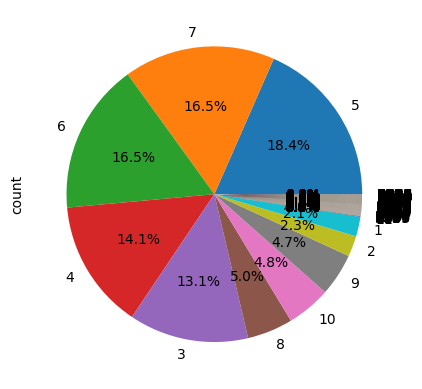

In [39]:
data['Num_Credit_Card'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [40]:
# card=data['Num_Credit_Card'].unique()
# for i in np.sort(card):
# #     print(i)
# for index,value in enumerate(data['Num_Credit_Card'].value_counts()):
#     print(index,value)

In [41]:
for i in range(6):
    for index in range(len(data)):
        current_value=data.loc[index,'Customer_ID']

        next_value=data.loc[index+1,'Customer_ID'] if index < len(data)-1 else None
        previous_value=data.loc[index-1,'Customer_ID'] if index > 0 else None

            
        
        # Second check (Reverse Order)
        if data.loc[index,'Num_Credit_Card']>11:
            if previous_value is not None and current_value == previous_value:
                data.loc[index,'Num_Credit_Card'] = data.loc[index-1,'Num_Credit_Card']
            elif next_value is not None and current_value == next_value:
                data.loc[index,'Num_Credit_Card'] = data.loc[index+1,'Num_Credit_Card']

In [42]:
for i in range(4):
    data=fill_values('Num_Credit_Card',data,11)

In [43]:
data['Num_Credit_Card'].unique()

array([ 4,  5,  1,  7,  6,  8,  3,  9,  2, 10, 11,  0], dtype=int64)

In [44]:
# a=data['Interest_Rate'].unique()
# for i in np.sort(a):
#     print(i)

In [45]:
for i in range(6):
    data=fill_values('Interest_Rate',data,34)


In [46]:
data[data['Interest_Rate']>34]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance


In [47]:
data['Num_of_Loan']=data['Num_of_Loan'].astype(str)
data['Num_of_Loan']=data['Num_of_Loan'].str.replace('-','') #data contain -100 and 0_ or _2
data['Num_of_Loan']=data['Num_of_Loan'].str.replace('_','')
data['Num_of_Loan']=[int(x) for x in data['Num_of_Loan']] #converting into integer

In [48]:
data['Num_of_Loan'].sample(10)

31263    0
19396    2
46920    2
46074    6
16746    6
19489    9
17885    2
28816    7
29789    1
13983    4
Name: Num_of_Loan, dtype: int64

In [49]:
for i in range(3):
    data=fill_values('Num_of_Loan',data,9)

In [50]:
data[data['Num_of_Loan']>9]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance


In [51]:
data['Type_of_Loan'].isna().sum()

5704

In [52]:
for index in range(len(data)):
    if data.loc[index,'Num_of_Loan']==0:
        data.loc[index,'Type_of_Loan']='No Loan'



In [53]:
data['Delay_from_due_date'].unique() #contain -ve values let's fill it w.r.t. customer id

array([ 3, -1,  4,  8,  6,  5,  9,  0, 30, 29, 11,  2,  1, 16, 10, 24, 23,
       12, 18, 17, 51, 34, 32, 45, 48, 25, 49, 43, 50, 22, 55, 52, 61, 59,
       60, 31, 27, 15, 53, 14, 13,  7, 44, 54, 20, 28, 57, 62, 56, 41, 37,
       19, 64, 36, 42, 21, 26, -2, 33, 46, 38, 35, 40, 47, 39, 66, 58, -4,
       -3, 63, 65, -5, 67], dtype=int64)

In [54]:
for i in range(8):
    for index in range(len(data)):
        current_value=data.loc[index,'Customer_ID']

        next_value=data.loc[index+1,'Customer_ID'] if index < len(data)-1 else None
        previous_value=data.loc[index-1,'Customer_ID'] if index > 0 else None
            
        # First check
        if data.loc[index,'Delay_from_due_date'] <0 or data.loc[index,'Delay_from_due_date'] >24:
            if previous_value is not None and current_value == previous_value:
                data.loc[index,'Delay_from_due_date'] = data.loc[index-1,'Delay_from_due_date']
            elif next_value is not None and current_value == next_value:
                data.loc[index,'Delay_from_due_date'] = data.loc[index+1,'Delay_from_due_date']
            
        # Second check (Reverse Order)
        if data.loc[index,'Delay_from_due_date']<0 or data.loc[index,'Delay_from_due_date'] >24:
                if next_value is not None and current_value == next_value:
                    data.loc[index,'Delay_from_due_date'] = data.loc[index+1,'Delay_from_due_date']
                elif previous_value is not None and current_value == previous_value:
                    data.loc[index,'Delay_from_due_date'] = data.loc[index-1,'Delay_from_due_date']

In [55]:
data['Delay_from_due_date'].unique()

array([ 3,  4,  8,  6,  5,  9,  0, 30, 11,  2,  1, 16, 10, 24, 23, 12, 18,
       17, 51, 32, 48, 25, 22, 52, 60, 27, 15, 53, 14, 13,  7, 44, 34, 59,
       20, 55, 62, 49, 54, 50, 37, 19, 36, 43, 21, 33, 26, 41, 28, 38, 29,
       57, 61, 45, 40, 46, 35, 39, 47, 31, 66, 42, 56, 58, 63, 64, 65],
      dtype=int64)

In [56]:
data['Num_of_Delayed_Payment'].isnull().sum()

3498

In [57]:
data['Num_of_Delayed_Payment']=data['Num_of_Delayed_Payment'].str.replace('_','')
data['Num_of_Delayed_Payment']=data['Num_of_Delayed_Payment'].ffill()
data['Num_of_Delayed_Payment']=[int(i)for i in data['Num_of_Delayed_Payment']]

In [58]:
# for i in np.sort(data['Num_of_Delayed_Payment'].unique()):
#     print(i)

In [59]:
for index in range(len(data)):
    if data.loc[index,'Num_of_Delayed_Payment'] <0:
        data.loc[index,'Num_of_Delayed_Payment']=999

In [60]:
for i in range(4):
    data=fill_values('Num_of_Delayed_Payment',data,24)



In [61]:
data['Num_of_Delayed_Payment'] = np.where(data['Num_of_Delayed_Payment'] == 999, 0, data['Num_of_Delayed_Payment'])


In [62]:
data['Num_of_Delayed_Payment'].unique()

array([ 7,  9,  4,  5,  1,  3,  2,  6,  8, 15, 18,  0, 14, 17, 12, 11, 19,
       20, 10, 13, 22, 23, 21, 16, 24, 25, 27, 28, 26], dtype=int64)

In [63]:

print('datatype is ',data['Changed_Credit_Limit'].dtype)
print('total null values are',data['Changed_Credit_Limit'].isnull().sum())
# for i in data['Changed_Credit_Limit'].unique():
#     print(i)


datatype is  object
total null values are 0


In [64]:
data['Changed_Credit_Limit']=data['Changed_Credit_Limit'].str.replace('_','9999')
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype(float)
data['Changed_Credit_Limit']=data['Changed_Credit_Limit'].apply(lambda x: f"{x:.2f}")
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype(float)

In [65]:
data['Changed_Credit_Limit'].dtype


dtype('float64')

In [66]:
for index in range(len(data)):
    if data.loc[index,'Changed_Credit_Limit'] <0.50:  #0.50 value was used by analyzing data in excel
        data.loc[index,'Changed_Credit_Limit']=9999.0

In [67]:
def fill_values3(column_name, data, threshold):
    for index in range(len(data)):
        current_value = data.loc[index, 'Customer_ID']

        next_value = data.loc[index + 1, 'Customer_ID'] if index < len(data) - 1 else None
        previous_value = data.loc[index - 1, 'Customer_ID'] if index > 0 else None

        if data.loc[index, column_name] > threshold:
            if previous_value is not None and current_value == previous_value:
                data.loc[index, column_name] = data.loc[index - 1, column_name]
            elif next_value is not None and current_value == next_value:
                data.loc[index, column_name] = data.loc[index + 1, column_name]


    return data




In [68]:
for i in range(2):
    data=fill_values('Changed_Credit_Limit',data,29.98)
    data=fill_values3('Changed_Credit_Limit',data,29.98) #29.99 value i found by analyzing data in Excel

In [69]:
data[data['Changed_Credit_Limit']>30]


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance


In [70]:
data['Num_Credit_Inquiries'].isnull().sum()

1035

In [71]:
data['Num_Credit_Inquiries'].dtype

dtype('float64')

In [72]:
data['Num_Credit_Inquiries']=data['Num_Credit_Inquiries'].fillna(999)
data['Num_Credit_Inquiries']=data['Num_Credit_Inquiries'].astype(int)

In [73]:
for i in range(4):
    data=fill_values('Num_Credit_Inquiries',data,17) #17 analyzed in Excel


In [74]:
print(data['Num_Credit_Inquiries'].unique())

[ 4  5  3  7  9  8  1 10 11 17 13  2  6  0 12 15 14 16]


In [75]:
print(data['Credit_Mix'].unique())
data['Credit_Mix']=data['Credit_Mix'].str.replace('_','s')

['Good' '_' 'Standard' 'Bad']


In [76]:
for i in range(6):
    data=fill_values2('Credit_Mix',data,'s')
    

    # for index in range(len(data)):
    #     current_value = data.loc[index, 'Customer_ID']

    #     next_value = data.loc[index + 1, 'Customer_ID'] if index < len(data) - 1 else None
    #     previous_value = data.loc[index - 1, 'Customer_ID'] if index > 0 else None

    #     # # First check
    #     # if data.loc[index, 'Credit_Mix'] == 's':
    #     #     if previous_value is not None and current_value == previous_value:
    #     #         data.loc[index, 'Credit_Mix'] = data.loc[index - 1, 'Credit_Mix']
    #     #     elif next_value is not None and current_value == next_value:
    #     #         data.loc[index,'Credit_Mix'] = data.loc[index + 1, 'Credit_Mix']

    #     # Second check (Reverse Order)
    #     if data.loc[index, 'Credit_Mix'] == 's':
    #         if next_value is not None and current_value == next_value:
    #             data.loc[index,'Credit_Mix'] = data.loc[index + 1, 'Credit_Mix']
    #         elif previous_value is not None and current_value == previous_value:
    #             data.loc[index, 'Credit_Mix'] = data.loc[index - 1, 'Credit_Mix']

  

In [77]:
data = data[~data['Credit_Mix'].isin(['s'])]

In [78]:
data['Credit_Mix'].value_counts()

Credit_Mix
Standard    22896
Good        15168
Bad         11852
Name: count, dtype: int64

In [79]:
data['Outstanding_Debt']=data['Outstanding_Debt'].str.replace('_','')
data['Outstanding_Debt']=data['Outstanding_Debt'].astype(float)

In [80]:
data['Credit_History_Age'].isnull().sum()

4459

In [81]:
data['Credit_History_Age']=data['Credit_History_Age'].fillna('abc')

In [82]:
data.reset_index(drop=True, inplace=True)
for i in range(4):
    data=fill_values2('Credit_History_Age',data,'abc')

data = data[~data['Credit_History_Age'].isin(['abc'])]

In [83]:
data[data['Credit_History_Age']=='abc']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance


In [84]:
data['Payment_of_Min_Amount'].value_counts()
#NM is the value which we have to update w.r.t. customer_ID

Payment_of_Min_Amount
Yes    26116
No     17816
NM      5980
Name: count, dtype: int64

In [85]:
data.reset_index(drop=True, inplace=True)
for i in range(5):
    data=fill_values2('Payment_of_Min_Amount',data,'NM')
data = data[~data['Payment_of_Min_Amount'].isin(['NM'])]
print(data['Payment_of_Min_Amount'].value_counts())

Payment_of_Min_Amount
Yes    29664
No     20240
Name: count, dtype: int64


In [86]:
data['Total_EMI_per_month'].dtype

dtype('float64')

In [87]:
data.reset_index(drop=True, inplace=True)
for i in range(4):
    data=fill_values('Total_EMI_per_month',data,1000)

In [88]:
for index in range(len(data)):
    if data.loc[index,'Num_of_Loan']==0:
        data.loc[index,'Total_EMI_per_month']=0


In [89]:
data['Total_EMI_per_month']=data['Total_EMI_per_month'].apply(lambda x: f"{x:.2f}")
data['Total_EMI_per_month']=data['Total_EMI_per_month'].astype(float)

In [90]:
data['Amount_invested_monthly'].isna().sum()

2268

In [91]:
data['Amount_invested_monthly']=data['Amount_invested_monthly'].str.replace('_','')
data['Amount_invested_monthly']=data['Amount_invested_monthly'].fillna('10000')
data['Amount_invested_monthly']=data['Amount_invested_monthly'].astype(float)

In [92]:
data.reset_index(drop=True, inplace=True)
for i in range(4):
    data=fill_values2('Amount_invested_monthly',data,10000)
data = data[~data['Amount_invested_monthly'].isin([10000])]

In [93]:
data['Amount_invested_monthly']=data['Amount_invested_monthly'].apply(lambda x: f"{x:.2f}")
data['Amount_invested_monthly']=data['Amount_invested_monthly'].astype(float)

In [94]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      12671
High_spent_Medium_value_payments     8904
High_spent_Large_value_payments      6830
Low_spent_Medium_value_payments      6821
High_spent_Small_value_payments      5636
Low_spent_Large_value_payments       5243
!@9#%8                               3795
Name: count, dtype: int64

In [95]:
data.reset_index(drop=True, inplace=True)
for i in range(5):
    data=fill_values2('Payment_Behaviour',data,'!@9#%8')

In [96]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      13658
High_spent_Medium_value_payments     9650
High_spent_Large_value_payments      7411
Low_spent_Medium_value_payments      7395
High_spent_Small_value_payments      6116
Low_spent_Large_value_payments       5670
Name: count, dtype: int64

In [97]:
data['Monthly_Balance']=data['Monthly_Balance'].str.replace('__-333333333333333333333333333__','abc')
data['Monthly_Balance']=data['Monthly_Balance'].fillna('abc')

In [98]:
data[data['Monthly_Balance']=='abc']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
135,0x1799,CUS_0x4004,December,Carlosj,44,679266464,Writer,58317.00,4664.75,8,...,10,Standard,98.97,22.597463,13 Years and 11 Months,Yes,149.90,620.00,Low_spent_Small_value_payments,abc
195,0x184d,CUS_0x9b3c,December,Scheydere,44,224487837,Lawyer,81842.28,6810.19,10,...,11,Bad,3053.16,24.389000,1 Years and 3 Months,Yes,574.07,556.78,Low_spent_Large_value_payments,abc
245,0x18e7,CUS_0x7504,October,NaN,19,389894542,Lawyer,73737.36,5936.78,7,...,2,Standard,1219.39,30.148089,31 Years and 10 Months,Yes,214.81,753.65,Low_spent_Small_value_payments,abc
256,0x190a,CUS_0xab76,September,Stempelp,26,878906321,Scientist,60162.10,5197.51,5,...,9,Standard,1037.45,26.641909,13 Years and 10 Months,Yes,220.21,660.80,Low_spent_Small_value_payments,abc
309,0x19a7,CUS_0x6856,October,Gellerp,25,251770979,Teacher,129067.59,10795.63,1,...,3,Good,137.15,38.372321,27 Years and 4 Months,No,389.31,1191.23,Low_spent_Small_value_payments,abc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49401,0x25a1f,CUS_0x50e9,October,NaN,34,190227771,Writer,59650.23,4677.85,5,...,12,Standard,1294.13,31.561166,7 Years and 2 Months,Yes,250.61,364.77,Low_spent_Small_value_payments,abc
49420,0x25a5a,CUS_0x2274,September,Natem,41,373638139,Entrepreneur,105931.17,8672.60,8,...,8,Standard,254.06,24.058312,5 Years and 9 Months,Yes,392.84,947.83,Low_spent_Small_value_payments,abc
49491,0x25b29,CUS_0x8848,December,enr,37,930776871,Engineer,62756.20,5194.68,10,...,14,Bad,3711.23,26.293742,4 Years and 8 Months,Yes,323.62,607.46,Low_spent_Small_value_payments,abc
49810,0x25ee8,CUS_0x40ad,November,Dorisw,20,715143312,Scientist,65858.48,5421.21,7,...,13,Standard,2344.57,23.482921,7 Years and 2 Months,Yes,261.20,126.42,Low_spent_Small_value_payments,abc


In [99]:
data.reset_index(drop=True, inplace=True)
for i in range(3):
    data=fill_values2('Monthly_Balance',data,'abc')

data = data[~data['Monthly_Balance'].isin(['abc'])]

In [100]:
data[data['Monthly_Balance']=='abc']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance


In [101]:
data['Monthly_Balance']=data['Monthly_Balance'].astype(float)
data['Monthly_Balance']=data['Monthly_Balance'].apply(lambda x: f"{x:.2f}")
data['Monthly_Balance']=data['Monthly_Balance'].astype(float)

In [102]:
data[data['Monthly_Balance']=='abc']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance


In [103]:
data['Credit_Utilization_Ratio']=data['Credit_Utilization_Ratio'].apply(lambda x: f"{x:.2f}")
data['Credit_Utilization_Ratio']=data['Credit_Utilization_Ratio'].astype(float)

In [104]:
# data['Credit_Utilization_Ratio']

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49896 entries, 0 to 49899
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        49896 non-null  object 
 1   Customer_ID               49896 non-null  object 
 2   Month                     49896 non-null  object 
 3   Name                      44890 non-null  object 
 4   Age                       49896 non-null  int64  
 5   SSN                       49896 non-null  int64  
 6   Occupation                49896 non-null  object 
 7   Annual_Income             49896 non-null  float64
 8   Monthly_Inhand_Salary     49896 non-null  float64
 9   Num_Bank_Accounts         49896 non-null  int64  
 10  Num_Credit_Card           49896 non-null  int64  
 11  Interest_Rate             49896 non-null  int64  
 12  Num_of_Loan               49896 non-null  int64  
 13  Type_of_Loan              49896 non-null  object 
 14  Delay_from_

In [110]:

clean_test = data.groupby(['Customer_ID']).agg({ 
    'Age':'mean',
    'SSN':'first', 
    'Occupation':'first',
    'Annual_Income':'first',
    'Monthly_Inhand_Salary':'mean',
    'Num_Bank_Accounts':'first',
    'Num_Credit_Card':'mean',
    'Interest_Rate':'mean',
    'Num_of_Loan':'mean',
    'Type_of_Loan':'first',
    'Delay_from_due_date':'mean',
    'Num_of_Delayed_Payment':'mean',
    'Changed_Credit_Limit':'mean',
    'Num_Credit_Inquiries':'mean', 
    'Credit_Mix':'first',
    'Outstanding_Debt':'mean',
    'Credit_Utilization_Ratio':'mean',
    'Credit_History_Age':'first',
    'Payment_of_Min_Amount':'first',
    'Total_EMI_per_month':'mean',
    'Amount_invested_monthly':'mean',
    'Payment_Behaviour':'first',
    'Monthly_Balance':'mean'
    }).reset_index()
clean_test['Age']=clean_test['Age'].astype(int)
clean_test['Num_Bank_Accounts']=clean_test['Num_Bank_Accounts'].astype(int)
clean_test['Num_Credit_Card']=clean_test['Num_Credit_Card'].astype(int)
clean_test['Num_of_Loan']=clean_test['Num_of_Loan'].astype(int)
clean_test['Delay_from_due_date']=clean_test['Delay_from_due_date'].astype(int)
clean_test['Num_of_Delayed_Payment']=clean_test['Num_of_Delayed_Payment'].astype(int)
clean_test['Num_Credit_Inquiries']=clean_test['Num_Credit_Inquiries'].astype(int)




In [118]:
clean_test.sample(5)

,Customer_ID,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
9077,CUS_0x981d,35,569614012,Developer,20063.56,1832.96,6,9,30.0,6,...,11,Standard,2633.67,35.9175,19 Years and 4 Months,Yes,95.00,98.4975,Low_spent_Small_value_payments,264.7975
5657,CUS_0x6549,20,905955824,Mechanic,39558.23,3542.52,4,3,4.0,1,...,0,Good,349.48,34.2975,30 Years and 9 Months,No,20.63,220.1325,High_spent_Small_value_payments,383.4950
6030,CUS_0x6a79,23,789623935,Lawyer,173668.84,14293.40,3,6,2.0,3,...,2,Good,710.17,40.9700,23 Years and 3 Months,No,310.16,330.9100,High_spent_Medium_value_payments,1040.7700
8421,CUS_0x8e53,36,494423830,Media_Manager,21145.60,1604.13,2,7,4.0,1,...,1,Good,969.19,33.8250,18 Years and 6 Months,No,12.67,56.7200,High_spent_Medium_value_payments,328.4775
10454,CUS_0xac8e,17,990904382,Mechanic,38904.52,3352.75,8,6,17.0,7,...,5,Standard,333.59,32.2175,12 Years and 9 Months,Yes,206.78,76.6000,High_spent_Small_value_payments,343.5200


In [119]:
clean_test.shape

(12474, 24)

In [121]:

data.to_csv('clean_test.csv')